# Data Exploration & Plotting


## Temporal Analysis

In [46]:
import os
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from itertools import dropwhile
from scipy.stats import linregress, ttest_1samp
import seaborn as sns

import numpy as np

from config import chat_data_path, raw_data_path, epochs

In [47]:
# Get channel names
with open(os.path.join(chat_data_path, "ActiveChats2023-04-03-cleaned.csv"), "r") as file:
    file.readline()
    ch_names = [name.rstrip() for name in file]



### Channel Activity, URL and User Frequencies
Monthly, by Epoch and Chat

In [48]:
# Chat Activity by Epoch
chat_activity_epoch = pd.DataFrame(columns= ['Chat Name', 'Epoch 1','Epoch 2','Epoch 3'])

i = 0
for chat in ch_names:
    res = [chat]
    for epoch in epochs.keys():
        ch_file = os.path.join(raw_data_path, f'chat_{chat}_epoch_{epoch}.csv')
        # Subtract one line for headers
        res.append(sum(1 for line in open(ch_file, 'r')) - 1)
    chat_activity_epoch.loc[i] = res
    i += 1
    

In [49]:
chat_activity = chat_activity_epoch.copy()
chat_activity['Sum'] = chat_activity_epoch['Epoch 1'] + chat_activity_epoch['Epoch 2'] + chat_activity_epoch['Epoch 3']
print(f"Total Messages : {chat_activity['Sum'].sum()}")
print(f"Mean Messages per Chat: {chat_activity['Sum'].mean()}")

Total Messages : 334056
Mean Messages per Chat: 12372.444444444445


<Axes: xlabel='Chat Name'>

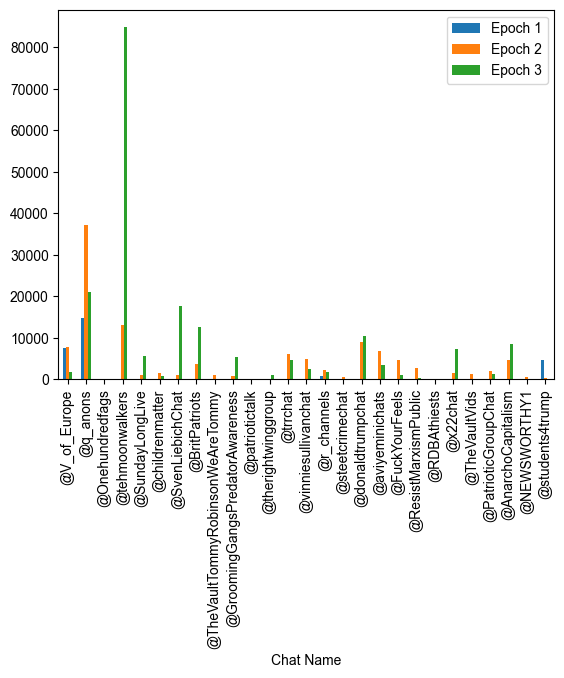

In [50]:
chat_activity_epoch.set_index('Chat Name').plot(kind = 'bar')

In [51]:
chat_activity_epoch.to_csv('Analysis/chat_activity_per_epoch.csv')


In [52]:
# Chat Activity by Month
start_date = epochs['Epoch 1'][0]
end_date = epochs['Epoch 3'][1]

dates = pd.date_range(start=start_date, end=end_date, freq='MS')
activity_months = pd.DataFrame(columns=ch_names, index= dates).fillna(0)


for chat in ch_names:
    for epoch in epochs.keys():
        ch_file = os.path.join(raw_data_path, f'chat_{chat}_epoch_{epoch}.csv')
        messages = pd.read_csv(ch_file, parse_dates=['MessageDate'], index_col='MessageDate', usecols=['MessageDate'])
        
        if len(messages) == 0:
            # can only perform following op on date indeciess
            continue

        monthly_counts = messages.groupby(pd.Grouper(freq='M')).size()
        monthly_counts.index = monthly_counts.index.map(lambda x : datetime(x.year, x.month, 1).date())
        activity_months[chat].update(monthly_counts)


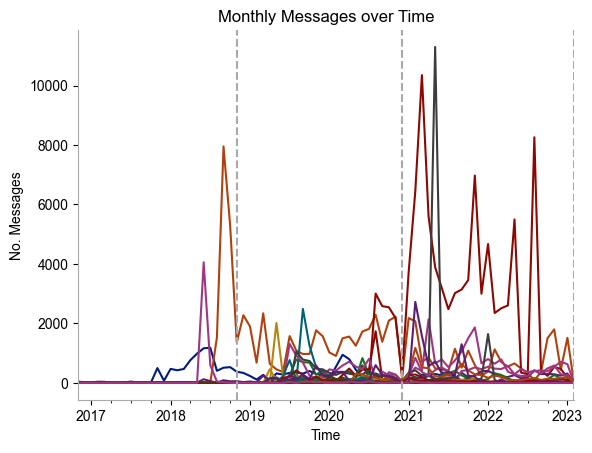

In [53]:
# Plot Values TODO: Make Pretty

# Set dark muted color palette
colors = sns.color_palette("dark", len(activity_months.columns))

plt.rcParams['font.family'] = 'Arial'
# Plot DataFrame
ax = activity_months.plot(color=colors)

# Remove legend
ax.legend().set_visible(False)

# Set axes color to dark gray
ax.spines['bottom'].set_color('darkgray')
ax.spines['left'].set_color('darkgray')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.set_xlabel("Time")
ax.set_ylabel("No. Messages")

ax.set_title("Monthly Messages over Time")

vertical_lines = [epochs['Epoch 1'][0], epochs['Epoch 1'][1], epochs['Epoch 2'][1], epochs['Epoch 3'][1]]  # example positions
for line in vertical_lines:
    ax.axvline(x=line, color='darkgray', linestyle='--')


# Set figure background color
fig = plt.gcf()

# Show the plot
plt.savefig('Plots/Messages_per_mnth.png', dpi=900, bbox_inches='tight')
plt.show()

In [54]:
start_date = epochs['Epoch 1'][0]
end_date = epochs['Epoch 3'][1]

dates = pd.date_range(start=start_date, end=end_date, freq='MS')
activity_url_months = pd.DataFrame(columns=ch_names, index= dates).fillna(0)

activity_url_epochs = pd.DataFrame(columns= ['Epoch 1','Epoch 2','Epoch 3'], index=ch_names).fillna(0)


for chat in ch_names:
    res = []
    for epoch in epochs.keys():
        ch_file = os.path.join(raw_data_path, f'chat_{chat}_epoch_{epoch}.csv')
        messages = pd.read_csv(ch_file, parse_dates=['MessageDate'], index_col='MessageDate', usecols=['MessageDate', 'MessageText'])
        # Remove messages without URL's
        url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

        if len(messages) == 0:
            res.append(0)
            continue

        # use the regular expression to check if each message contains a URL
        has_url = messages['MessageText'].str.contains(url_regex, na=False)
        messages = messages[has_url]

        monthly_counts = messages.groupby(pd.Grouper(freq='M')).size()
        monthly_counts.index = monthly_counts.index.map(lambda x : datetime(x.year, x.month, 1).date())
        activity_url_months[chat].update(monthly_counts)

        res.append(monthly_counts.sum())
    

    activity_url_epochs.loc[chat] = res

In [55]:
chat_url = activity_url_epochs.copy()
chat_url['Sum'] = activity_url_epochs['Epoch 1'] + activity_url_epochs['Epoch 2'] + activity_url_epochs['Epoch 3']
print(f"Total URLs : {chat_url['Sum'].sum()}")
print(f"Mean URLs per Chat: {chat_url['Sum'].mean()}")

Total URLs : 89119
Mean URLs per Chat: 3300.703703703704


<Axes: >

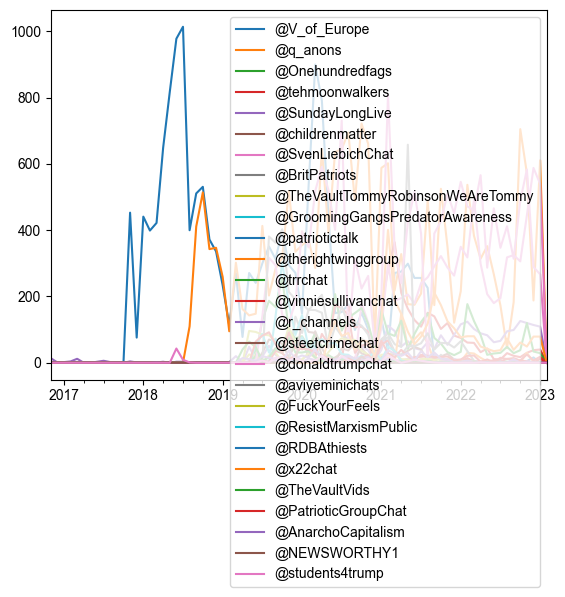

In [56]:
activity_url_months.plot()

<Axes: >

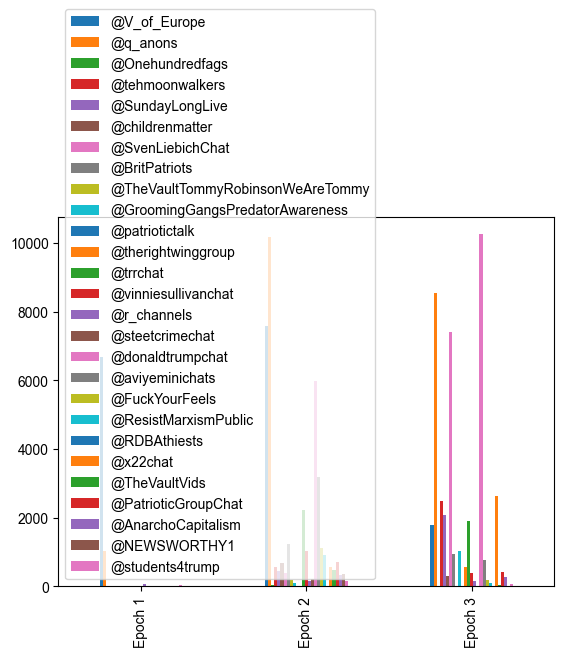

In [57]:
activity_url_epochs.T.plot(kind="bar")

In [58]:
activity_url_epochs


,Epoch 1,Epoch 2,Epoch 3
@V_of_Europe,6691,7591,1775
@q_anons,1035,10166,8559
@Onehundredfags,0,41,0
@tehmoonwalkers,0,569,2497
@SundayLongLive,0,456,2081
@childrenmatter,0,683,312
@SvenLiebichChat,0,402,7409
@BritPatriots,0,1232,955
@TheVaultTommyRobinsonWeAreTommy,0,180,13
@GroomingGangsPredatorAwareness,0,98,1044


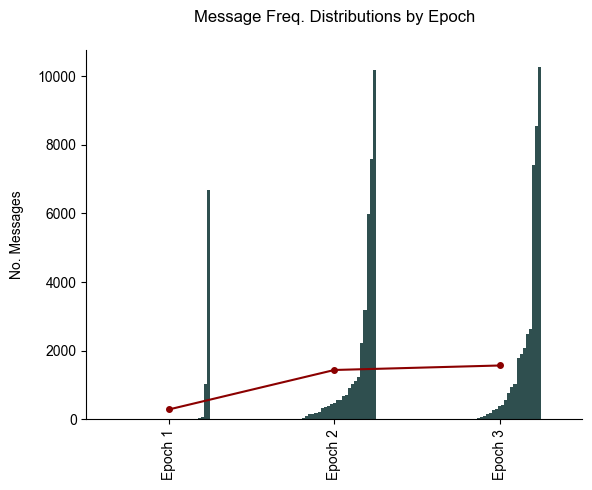

In [59]:

# Sort each column in the dataframe
sorted_data = activity_url_epochs.apply(sorted, axis=0)

# Calculate the mean values
mean_values = sorted_data.mean()

# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Create the bar plot with sorted data
ax = sorted_data.T.plot(kind='bar', legend=False, color='darkslategray')

# Plot the mean values with a line
plt.plot(mean_values.index, mean_values.values, color='darkred', linestyle='-', marker='o', markersize=4)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.set_ylabel('No. Messages', labelpad=10)

ax.set_title('Message Freq. Distributions by Epoch', pad=20)

plt.savefig('Plots/Messages_per_epoch.png', dpi=900, bbox_inches='tight')
plt.show()

In [60]:
start_date = epochs['Epoch 1'][0]
end_date = epochs['Epoch 3'][1]

dates = pd.date_range(start=start_date, end=end_date, freq='MS')
activity_user_months = pd.DataFrame(columns=ch_names, index= dates).fillna(0)

activity_user_epochs = pd.DataFrame(columns= ['Epoch 1','Epoch 2','Epoch 3'], index=ch_names).fillna(0)


for chat in ch_names:
    res = []
    for epoch in epochs.keys():
        ch_file = os.path.join(raw_data_path, f'chat_{chat}_epoch_{epoch}.csv')
        messages = pd.read_csv(ch_file, parse_dates=['MessageDate'], index_col='MessageDate', usecols=['MessageDate', 'SenderID'])
        
        if len(messages) == 0:
            res.append(0)
            continue
        
        user_counts = messages
        user_counts.index = user_counts.index.map(lambda x : datetime(x.year, x.month, 1).date())
        user_counts = user_counts.groupby('MessageDate').nunique()


        activity_user_months[chat].update(user_counts['SenderID'])

        res.append(user_counts.sum()[0])
    
    activity_user_epochs.loc[chat] = res

In [61]:
chat_user = activity_user_epochs.copy()
chat_user['Sum'] = activity_user_epochs['Epoch 1'] + activity_user_epochs['Epoch 2'] + activity_user_epochs['Epoch 3']
print(f"Total Distinct Users : {chat_user['Sum'].sum()}")
print(f"Mean Distinct Users per Chat: {chat_user['Sum'].mean()}")

Total Distinct Users : 26793
Mean Distinct Users per Chat: 992.3333333333334


In [62]:
# Compute the distinct User/URL Coefficiens Per Month and Epoch
# by dividing the number of distinct users / URLs by the total activity in the chat


# By Epoch and Total -- chat_user, chat_url, chat_activity
# By Month activity_url_months, activity_months, activity_user_months

# Since Nan's only occur when zero messages have been sent, 
# we can safely assume there are zero active users / URLs shared
user_coeff_months = (activity_user_months / activity_months).fillna(0)
user_coeff_epochs = chat_user / chat_activity.set_index(['Chat Name'])
user_coeff_epochs = user_coeff_epochs.fillna(0)


url_coeff_months = (activity_url_months / activity_months).fillna(0)
url_coeff_epochs = chat_url / chat_activity.set_index(['Chat Name'])
url_coeff_epochs = url_coeff_epochs.fillna(0)



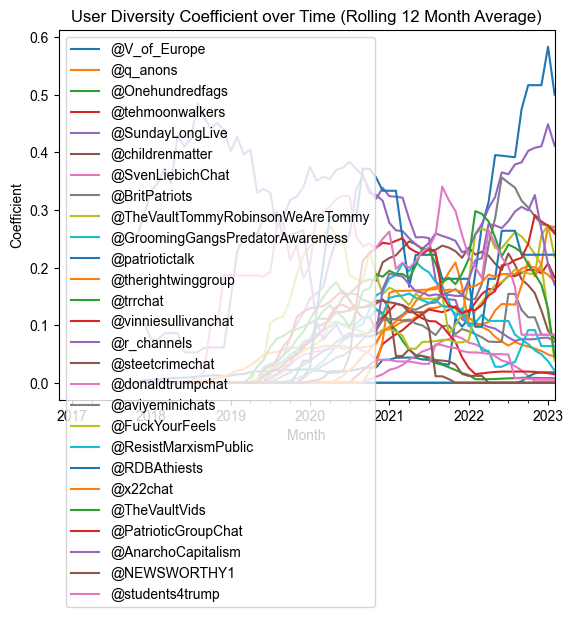

In [63]:

window_size = 12
rolling_window = user_coeff_months.rolling(window=window_size).mean()
# plot the smoothed data
rolling_window.plot()

# add title and labels
plt.title('User Diversity Coefficient over Time (Rolling 12 Month Average)')
plt.xlabel('Month')
plt.ylabel('Coefficient')
plt.show()
# TODO: Add mean coefficient of chat
# TODO: Statistical test for significance

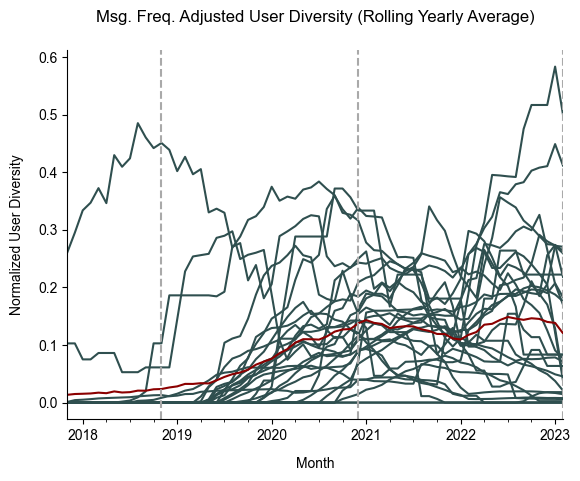

In [123]:

window_size = 12
rolling_window = user_coeff_months.rolling(window=window_size).mean()
row_means = rolling_window.mean(axis=1)
fig, ax = plt.subplots()
# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Create the plot with the smoothed data
rolling_window.plot(color='darkslategray', legend=False, ax=ax)

# Create the plot of row means in dark red

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the title
ax.set_title('Msg. Freq. Adjusted User Diversity (Rolling Yearly Average)', pad=20)

# Set the x-axis label
ax.set_xlabel('Month', labelpad=10)

# Set the y-axis label
ax.set_ylabel('Normalized User Diversity', labelpad=10)

# fig.plot(row_means, color='darkred')
row_means.plot(color="darkred", ax=ax, linewidth=2.5)

start_date = datetime(2017, 11, 25)  # Replace with the desired start date
ax.set_xlim(start_date, None)


vertical_lines = [epochs['Epoch 1'][0], epochs['Epoch 1'][1], epochs['Epoch 2'][1], epochs['Epoch 3'][1]]  # example positions
for line in vertical_lines:
    ax.axvline(x=line, color='darkgray', linestyle='--')

# Show the plot
plt.savefig('Plots/Norm_User_Diversity.png', dpi=900, bbox_inches='tight')
plt.show()

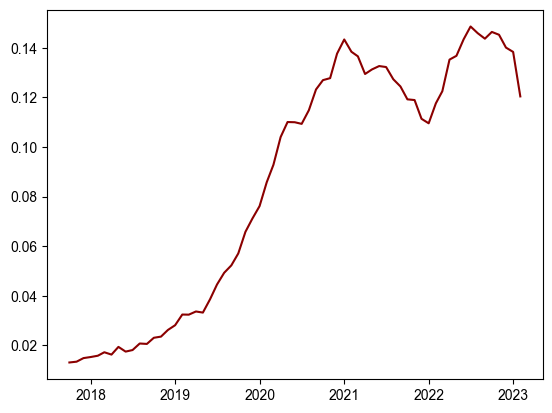

In [103]:
plt.plot(row_means,  color='darkred')

#### TODO: Candle Ring Correlation

In [ ]:
# We consider each chat to be an independent sample of a chat relating far right british poltics
# By fitting a linear function to each chat and testing weather the coefficient is statisticaly significantly
# greater than 0, we can attempt to prove that the user diversity within a chat is in general increasing

# Note that since some chats are dead before a certain date it cannot be said for certain weather this is a product
# of relevant factors or just the natural lifespan of a chat

# Slope coefficient for each chat
slopes_user = []
slopes_url = []

for chat in ch_names:
    series_user = user_coeff_months[chat]
    series_url = url_coeff_months[chat]

    # Remove leading/trailing zeros so as not to bias the results
    # As chats are more likely to have leading zeros due to us sampling
    # currently active chats
    series_user = pd.Series(dropwhile(lambda x : x == 0, series_user))
    series_user = pd.Series(dropwhile(lambda x : x == 0, series_user.iloc[::-1])).iloc[::-1]
    series_user.index = list(range(len(series_user)))    
    slope_user, intercept, r_value, p_value, std_err = linregress(series_user.index , series_user)

    series_url = pd.Series(dropwhile(lambda x : x == 0, series_url))
    series_url = pd.Series(dropwhile(lambda x : x == 0, series_url.iloc[::-1])).iloc[::-1]
    series_url.index = list(range(len(series_url)))    
    slope_url, intercept, r_value, p_value, std_err = linregress(series_url.index , series_url)
    
    if np.isnan(slope_user):
        slope_user = 0.0
    if np.isnan(slope_url):
        slope_url = 0.0

    slopes_user.append(slope_user)
    slopes_url.append(slope_url)



/Users/louis.heath/Documents/School/TelegramNetworkAnalysis/sn_venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/louis.heath/Documents/School/TelegramNetworkAnalysis/sn_venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/louis.heath/Documents/School/TelegramNetworkAnalysis/sn_venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/louis.heath/Documents/School/TelegramNetworkAnalysis/sn_venv/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/louis.heath/Documents/School/TelegramNetworkAnalysis/

In [ ]:
# T test for URLs
t_statistic, p_value = ttest_1samp(slopes_url, 0.0)

print("t-statistic: ", t_statistic)
print("p-value: ", p_value/2)  # Divide by 2 for a one-tailed test

# Not significant, failed to reject H0, sample mean seems to be zero
print('Sample Mean: ', np.mean(slopes_url))


t-statistic:  0.39687018266781837
p-value:  0.3473510839118713
Sample Mean:  0.00171647602462001


In [ ]:
# Test for Unique User Frequency Coeff
# T test for URLs
t_statistic, p_value = ttest_1samp(slopes_user, 0.0)

print("t-statistic: ", t_statistic)
print("p-value: ", p_value/2)  # Divide by 2 for a one-tailed test

# Not significant, failed to reject H0, sample mean seems to be zero
print('Sample Mean: ', np.mean(slopes_user))

t-statistic:  0.9662475119585723
p-value:  0.17141136241769678
Sample Mean:  0.0012460081132361024


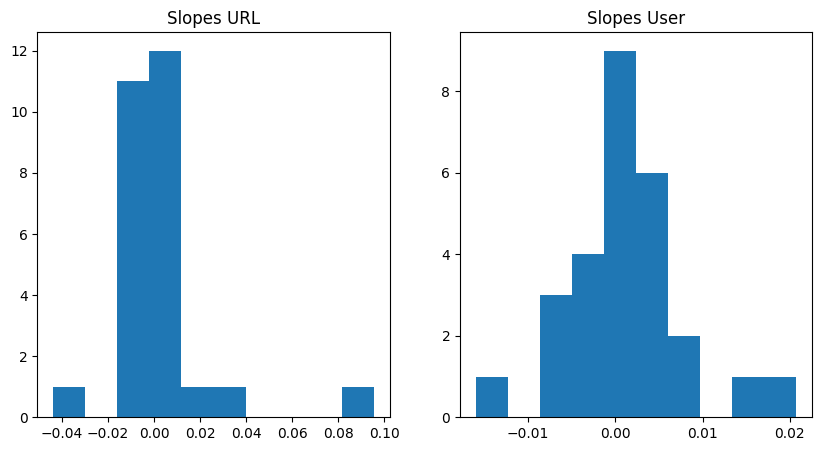

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(slopes_url)
ax1.set_title("Slopes URL")
ax2.hist(slopes_user)
ax2.set_title("Slopes User")
plt.show()

# Observation, slopes user has a higher variance than slopes URL

### TODO:
- Make plots look good
- Add average / mean to plots
- Perform test for increased frequency around major events

## Topic Analysis

In [ ]:
from bertopic import BERTopic

from config import model_data_path

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.backend._utils import select_backend

In [ ]:
sentence_model = SentenceTransformer("paraphrase-MiniLM-L12-v2")
model = select_backend(sentence_model)
my_loaded_topic_model = BERTopic.load("my_model", embedding_model=model)

In [ ]:
model = BERTopic.load(
    os.path.join(
    model_data_path,
    "topic_model_300K_multil_miniLM_L12_v2"
    )
    )

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

Add challanges to presentation
Fix analysis with new proposed technique

TODO: Send Airas Meta Topics List so he can analyse
TODO: Send Airas number of messages per chat per epoch
TODO: Send Airas Noramlised Meta Topic Incidence
TODO: Look if the brexit UK groups decrease in use more after brexit, see what groups exhibit this monotonicity

TODO:List metatpoics along with total metatopic mass

TODO: Send Airas List of Nodes
    --- Add Properties, No users, Strength of Each meta topic, No messages
    --- Need to match the ID

SyntaxError: invalid syntax (3081679364.py, line 1)